In [67]:
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.applications import vgg16
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [92]:
inputs = Input(shape=(28, 28, 1))
x = Conv2D(filters=64, kernel_size=(3,3), padding="same")(inputs)
# x = Conv2D(filters=64, kernel_size=(3,3), padding="same")(x)
x = MaxPooling2D()(x)
# x = Conv2D(filters=128, kernel_size=(3,3), padding="same")(x)
# x = Conv2D(filters=128, kernel_size=(3,3), padding="same")(x)
# x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='sigmoid')(x)
# x = Dense(units=256, activation='sigmoid')(x)
# x = Dense(units=128, activation='sigmoid')(x)
outputs = Dense(units=10, activation='sigmoid')(x)
model_same_vgg16 = Model(inputs=inputs, outputs=outputs, name="Same_as_VGG16")
model_same_vgg16.summary()

Model: "Same_as_VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 12544)             0         
                                                                 
 dense_26 (Dense)            (None, 512)               6423040   
                                                                 
 dense_27 (Dense)            (None, 10)                5130      
                                                     

In [71]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
x_train[0].shape
# y_train.shape

(28, 28)

In [72]:
x_train_flattened = x_train.reshape(len(x_train), 28, 28, 1)
x_test_flattened = x_test.reshape(len(x_test), 28, 28, 1)

In [93]:
model_same_vgg16.compile(optimizer='adam', 
                         loss='sparse_categorical_crossentropy', 
                         metrics=['accuracy'])
model_same_vgg16.fit(x_train_flattened, y_train, epochs=3)
model_same_vgg16.evaluate(x_test, y_test)

Epoch 1/3
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1787 - accuracy: 0.9467
Epoch 2/3
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0580 - accuracy: 0.9829
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.0511 - accuracy: 0.9836


[0.05113133415579796, 0.9836000204086304]

In [94]:
y_predicted = model_same_vgg16.predict(x_test_flattened)
# y_predicted = y_predicted.argmax(axis=1)


313/313 [==============================] - 1s 4ms/step


[9.2848456e-03 7.3940054e-02 3.3406264e-01 9.7287184e-01 1.0257575e-03
 8.4418938e-02 4.8248280e-06 9.9999231e-01 2.1953957e-02 3.9562598e-01]
7
7


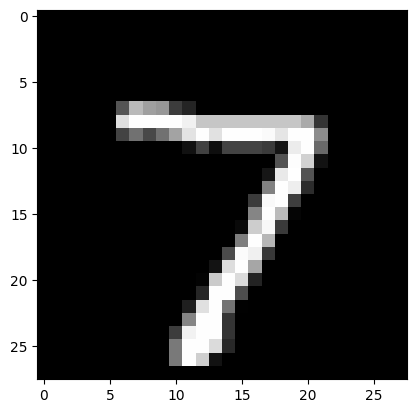

In [95]:
print(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[0])
print(y_test[0])
plt.imshow(x_test_flattened[0], cmap='gray')

In [96]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[ 966    0    2    0    0    0    9    1    2    0]
 [   0 1124    4    0    0    1    3    2    1    0]
 [   1    1 1017    1    1    0    2    7    1    1]
 [   0    0    3  997    0    5    0    2    2    1]
 [   0    0    1    0  972    0    4    0    0    5]
 [   1    0    1    4    0  882    3    0    1    0]
 [   4    2    0    1    2    4  942    0    3    0]
 [   1    2    9    1    3    0    0 1002    1    9]
 [   3    0    4    0    3    2    2    5  952    3]
 [   2    1    0    5   14    3    0    2    0  982]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

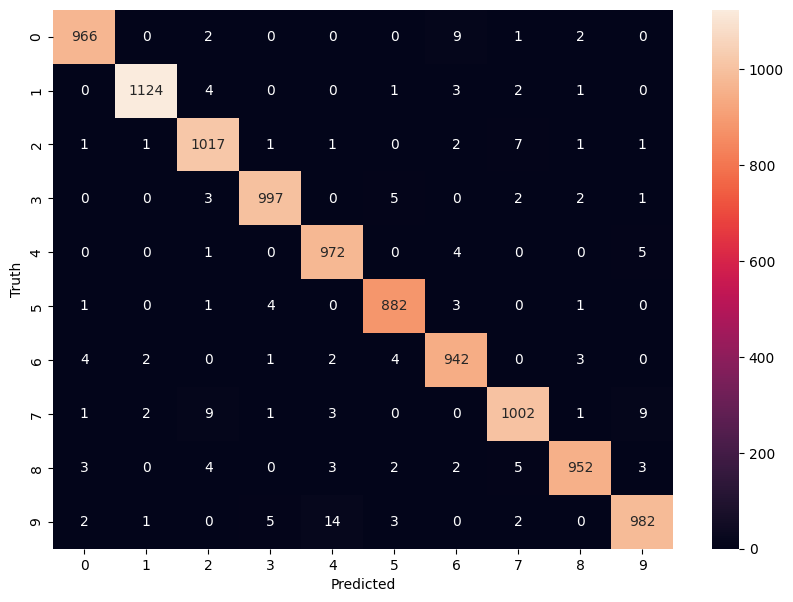

In [97]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')